In [4]:
import numpy as np
import pandas as pd

In [5]:
pd.set_option('precision', 1)

**Question 1** (25 points)

There is simulated data of 25,000 human heights and weights of 18 years old children at this URL
`http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html`

The original data has height in inches and weight in pounds. 

- Find the average height in cm, weight in kg, and BMI for each of the four categories defined below:

```
BMI             Category
18 or less      Underweight
18 – 22         Normal
22 – 25         Overweight
More than 25    Obese
```

- Do this in a reproducible way - that is, **all** processing of the data must be done in **code**
- Use **method chaining** to generate the summary

Your final table should look like this:

| status      |   ht_in_cm |   wt_in_kg |     bmi |
|:------------|-----------:|-----------:|--------:|
| Underweight |    173.1 |    51.4 | 17.1 |
| Normal      |    172.7 |    58.8 | 19.7 |
| Overweight  |    170.6 |    65.9 | 22.6 |
| Obese       |    166.1 |    70.0 | 25.4 |

Notes

- 1 inch = 2.54 cm
- 1 pound = 0.453592 kg
- BMI = weight in kg / (height in meters^2)

In [6]:
url = 'https://rb.gy/u3dvsb'
df = pd.read_html(url, header=0, index_col=0)[0]

In [7]:
s = (
    df.
    assign(
        ht_in_cm = 2.54*df['Height(Inches)'],
        wt_in_kg = 0.453592*df['Weight(Pounds)'],
    ).
    drop(['Height(Inches)','Weight(Pounds)'], axis=1).
    pipe(lambda x: x.assign(bmi = x.wt_in_kg/(x.ht_in_cm/100)**2)).
    pipe(lambda x: x.assign(
        status = pd.cut(x.bmi, [0,18,22,25,np.infty], 
                        labels=['Underweight', 'Normal', 'Overweight', 'Obese']))).
    groupby('status').
    mean()
)

In [8]:
s

,ht_in_cm,wt_in_kg,bmi
status,,,
Underweight,173.1,51.4,17.1
Normal,172.7,58.8,19.7
Overweight,170.6,65.9,22.6
Obese,166.1,70.0,25.4


**Question 2** (25 points)

Using the `EtLT` data pipeline pattern.

- Using `requests`, download all people from the Star Wars REST API at https://swapi.dev/api and store the information about each person in a MongoDB database
- Extract the data from MongoDB database
- Flatten the nested JSON structure into a `pandas` DataFrame
- Save to an SQLite3 database
- Use SQL to transform the data in the SQLite3 dataase <font color=red>This question is not clear and was not considred in grading</font>

In [9]:
import requests

sw_people = requests.get('https://swapi.dev/api/people').json()['results']

In [10]:
from pymongo import MongoClient

In [11]:
client = MongoClient('mongodb:27017')

In [12]:
client.drop_database('starwars')

In [13]:
db = client.starwars

In [14]:
people = db.people

In [15]:
result = people.insert_many(sw_people)

In [16]:
import pandas as pd

In [20]:
df = pd.DataFrame(list(people.find()))

In [ ]:
# df = pd.DataFrame(sw_people)

In [21]:
df.head()

,_id,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,5f917f43e489c3c93705ab0c,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,http://swapi.dev/api/planets/1/,"[http://swapi.dev/api/films/1/, http://swapi.d...",[],"[http://swapi.dev/api/vehicles/14/, http://swa...","[http://swapi.dev/api/starships/12/, http://sw...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,http://swapi.dev/api/people/1/
1,5f917f43e489c3c93705ab0d,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,http://swapi.dev/api/planets/1/,"[http://swapi.dev/api/films/1/, http://swapi.d...",[http://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,http://swapi.dev/api/people/2/
2,5f917f43e489c3c93705ab0e,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,http://swapi.dev/api/planets/8/,"[http://swapi.dev/api/films/1/, http://swapi.d...",[http://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,http://swapi.dev/api/people/3/
3,5f917f43e489c3c93705ab0f,Darth Vader,202,136,none,white,yellow,41.9BBY,male,http://swapi.dev/api/planets/1/,"[http://swapi.dev/api/films/1/, http://swapi.d...",[],[],[http://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,http://swapi.dev/api/people/4/
4,5f917f43e489c3c93705ab10,Leia Organa,150,49,brown,light,brown,19BBY,female,http://swapi.dev/api/planets/2/,"[http://swapi.dev/api/films/1/, http://swapi.d...",[],[http://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,http://swapi.dev/api/people/5/


In [22]:
df.films

0    [http://swapi.dev/api/films/1/, http://swapi.d...
1    [http://swapi.dev/api/films/1/, http://swapi.d...
2    [http://swapi.dev/api/films/1/, http://swapi.d...
3    [http://swapi.dev/api/films/1/, http://swapi.d...
4    [http://swapi.dev/api/films/1/, http://swapi.d...
5    [http://swapi.dev/api/films/1/, http://swapi.d...
6    [http://swapi.dev/api/films/1/, http://swapi.d...
7                      [http://swapi.dev/api/films/1/]
8                      [http://swapi.dev/api/films/1/]
9    [http://swapi.dev/api/films/1/, http://swapi.d...
Name: films, dtype: object

In [23]:
df = (
    df.
    explode('films').
    explode('species').
    explode('vehicles').
    explode('starships')
)

In [24]:
df.shape

(74, 17)

In [25]:
df.head()

,_id,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,5f917f43e489c3c93705ab0c,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,http://swapi.dev/api/planets/1/,http://swapi.dev/api/films/1/,NaN,http://swapi.dev/api/vehicles/14/,http://swapi.dev/api/starships/12/,2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,http://swapi.dev/api/people/1/
0,5f917f43e489c3c93705ab0c,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,http://swapi.dev/api/planets/1/,http://swapi.dev/api/films/1/,NaN,http://swapi.dev/api/vehicles/14/,http://swapi.dev/api/starships/22/,2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,http://swapi.dev/api/people/1/
0,5f917f43e489c3c93705ab0c,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,http://swapi.dev/api/planets/1/,http://swapi.dev/api/films/1/,NaN,http://swapi.dev/api/vehicles/30/,http://swapi.dev/api/starships/12/,2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,http://swapi.dev/api/people/1/
0,5f917f43e489c3c93705ab0c,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,http://swapi.dev/api/planets/1/,http://swapi.dev/api/films/1/,NaN,http://swapi.dev/api/vehicles/30/,http://swapi.dev/api/starships/22/,2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,http://swapi.dev/api/people/1/
0,5f917f43e489c3c93705ab0c,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,http://swapi.dev/api/planets/1/,http://swapi.dev/api/films/2/,NaN,http://swapi.dev/api/vehicles/14/,http://swapi.dev/api/starships/12/,2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,http://swapi.dev/api/people/1/


In [29]:
import sqlite3

In [45]:
conn = sqlite3.connect('data/people.db')

In [46]:
df['_id'] = df['_id'].astype('string')

In [47]:
df.to_sql('people', conn, index=False)

In [48]:
cr = conn.cursor()

In [49]:
cr.execute('SELECT * FROM people LIMIT 1')

In [50]:
cr.fetchall()

[('5f917f43e489c3c93705ab0c',
  'Luke Skywalker',
  '172',
  '77',
  'blond',
  'fair',
  'blue',
  '19BBY',
  'male',
  'http://swapi.dev/api/planets/1/',
  'http://swapi.dev/api/films/1/',
  None,
  'http://swapi.dev/api/vehicles/14/',
  'http://swapi.dev/api/starships/12/',
  '2014-12-09T13:50:51.644000Z',
  '2014-12-20T21:17:56.891000Z',
  'http://swapi.dev/api/people/1/')]

**Question 3** (50 points)

The data set in `dm.csv` contains 11 columns as described below. The first 10 columns are features (X), and the last is the target (y). The features have been transformed such that the mean = zero, and the sum of squares = 0.

```
age     age in years
sex
bmi     body mass index
bp      average blood pressure
s1      tc, T-Cells (a type of white blood cells)
s2      ldl, low-density lipoproteins
s3      hdl, high-density lipoproteins
s4      tch, thyroid stimulating hormone
s5      ltg, lamotrigine
s6      glu, blood sugar level
target  measure of disease severity at 1 year
```

- Split the data into X_train, X_test, y_train, y_test
- Plot the correlation matrix of X_train features as a heatmap using seaborn
- Perform a PCA on X_train
- Display a biplot of X_train projected on the first 2 principal components
- Write a function that returns the number of components needed to explain p% of the variance in X_train, and show the result for p=90
- Create a dummy regression model AND a proper regression model with sklearn's RandomForestRegressor to predict the target from the 10 features
    - Perform hyperparameter optimization on at least 2 parameters of the Random Forest model using  GridSearch and create a tuned RandomForestRegressor model with the best parameters
    - Plot the learning curve for the tuned Random Forest
    - Evaluate the model performance on test data using R^2 and mean absolute error for both dummy and Random Forest models
    - Plot feature importances for the Random Forest model using permutation importance and mean absolute Shapley values

In [13]:
data = pd.read_csv('dm.csv')

In [14]:
import matplotlib.pyplot as plt

In [15]:
import seaborn as sns

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    data.iloc[:, :10], data.iloc[:, -1]
)

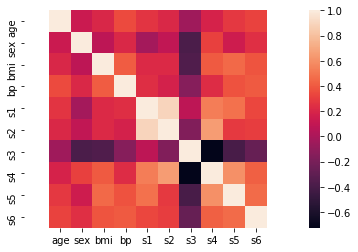

In [18]:
sns.heatmap(X_train.corr())
plt.axis('equal');

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA()

In [21]:
pc = pca.fit_transform(X_train)

In [22]:
from yellowbrick.features import PCA as PCA_

/usr/local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


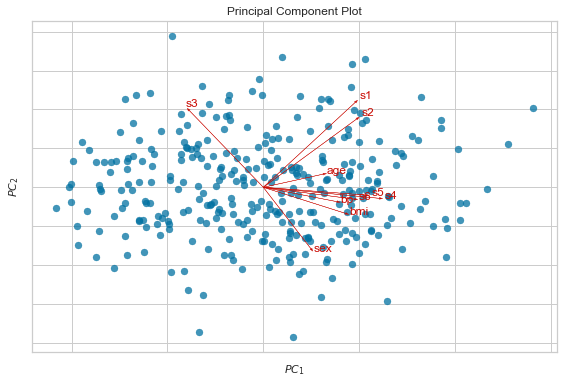

In [23]:
pca_viz = PCA_(proj_features = True)
pca_viz.fit_transform(X_train)
pca_viz.show();

In [24]:
pca.explained_variance_ratio_.cumsum()

array([0.3938944 , 0.55246822, 0.67854365, 0.77275027, 0.83839844,
       0.896071  , 0.94794905, 0.99159751, 0.99915237, 1.        ])

In [25]:
def n_comp(pca, threshold):
    """Returns number of compoentns to exceed threshold explained variance."""

    return (pca.explained_variance_ratio_.cumsum() > threshold).nonzero()[0][0] + 1

In [26]:
n_comp(pca, 0.9)

7

In [27]:
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor

In [28]:
dummy = DummyRegressor()
rf = RandomForestRegressor()

In [29]:
rf.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state',
 'ccp_alpha')

In [30]:
params = {
    'max_depth': [2,5,10, None],
    'min_samples_leaf': [1,2,5,10],
}

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
gs = GridSearchCV(rf, params)

In [33]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 5, 10, None],
                         'min_samples_leaf': [1, 2, 5, 10]})

In [34]:
tuned_rf = RandomForestRegressor(**gs.best_params_)

In [35]:
from yellowbrick.model_selection import LearningCurve

/usr/local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


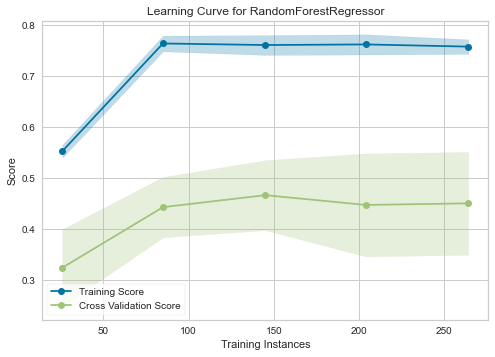

In [36]:
lc_viz = LearningCurve(tuned_rf)
lc_viz.fit(X_train, y_train)
lc_viz.show();

In [37]:
from sklearn.metrics import r2_score, mean_absolute_error

In [38]:
dummy.fit(X_train, y_train)

DummyRegressor()

In [39]:
r2_score(y_test, dummy.predict(X_test))

-0.008049786643475443

In [40]:
mean_absolute_error(y_test, dummy.predict(X_test))

66.73887482648813

In [41]:
tuned_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=5)

In [42]:
r2_score(y_test, tuned_rf.predict(X_test))

0.41069055541007526

In [43]:
mean_absolute_error(y_test, tuned_rf.predict(X_test))

46.516645036505324

In [44]:
from sklearn.inspection import permutation_importance

In [45]:
importances = permutation_importance(tuned_rf, X_train, y_train)

In [46]:
importances['importances_mean']

array([0.04036892, 0.02431191, 0.41417585, 0.10592373, 0.02609774,
       0.04286938, 0.05566862, 0.02065504, 0.22893281, 0.09073558])

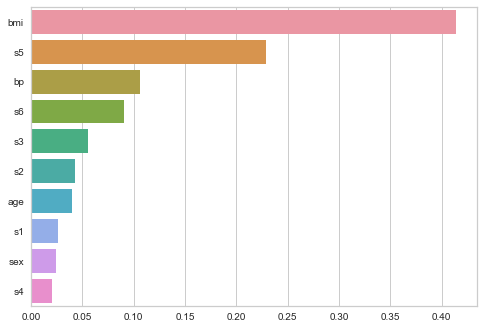

In [47]:
idx = np.argsort(-importances['importances_mean'])
sns.barplot(importances['importances_mean'][idx], X_train.columns[idx]);

In [48]:
import shap

In [49]:
explainer = shap.TreeExplainer(tuned_rf)

In [50]:
sv = explainer.shap_values(X_train)

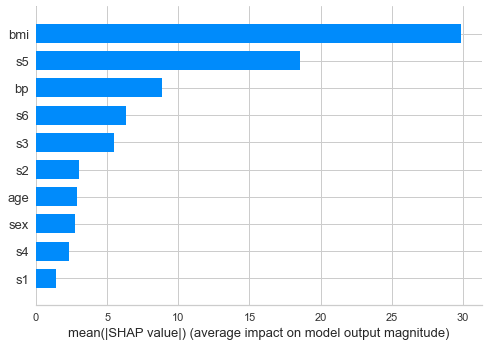

In [51]:
shap.summary_plot(sv, plot_type='bar', feature_names=X_train.columns)